In [ ]:
# TODO:
# sum multiple columns into categories (tidal_flat, mangrove, reef)
# calculate df for tidal_flat, mangrove, reef
# replace 2001 row with data from data/updated/2011.xlsx.

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
 

In [2]:
column_name_mapping={
    "Value_1": "OPEN_OCEAN",
    "Value_2": "ESTUARINE_",
    "Value_3": "REGULARLY_",
    "Value_5": "NON_TIDAL_",
    "Value_7": "ROCKY_INTE",
    "Value_8": "DEVELOPED_",
    "Value_9": "TIDAL_FLAT",
    "Value_10": "MANGROVE",
    "Value_11": "UNDEVELOPE",
    "Value_12": "OCEAN_BEAC",
    "Value_13": "TIDAL_SWAM",
    "Value_14": "ESTUARINE1",
    "Value_15": "RIVERINE_T",
    "Value_16": "TIDAL_CREE",
    "Value_17": "INLAND_FRE",
    "Value_18": "INLAND_OPE",
    "Value_19": "OCEAN_FLAT",
    "Value_20": "XXX",
    "Value_23": "YYY",
}

years = ['2001', '2025', '2050', '2075', '2100']

dataframes = []

for year in years:
    single_df = pd.read_excel(f'./tables/Landuse_NWI_{year}_RCP45.xlsx')
    single_df = single_df.rename(columns=column_name_mapping)


    single_df_tidal_flat = single_df[['LABEL', 'TIDAL_FLAT']].set_index('LABEL').rename(columns={'TIDAL_FLAT': year})
    dataframes.append(single_df_tidal_flat)

df = pd.concat(dataframes, axis=1).T
df = df.loc[:, (df != 0).any(axis=0)] # drop columns where all values are zero
df

LABEL,OPEN SPACE,ROAD,PORT / AIRPORT,RESERVE SITE,BUSINESS 2,SPORTS & RECREATION,WATERBODY,AGRICULTURE,SPECIAL USE,RESIDENTIAL,CIVIC & COMMUNITY INSTITUTION,HEALTH & MEDICAL CARE,PARK,BEACH AREA
2001,49156,429,790,15840,258,751,3194,2990,16,221,10,23,12806,9
2025,48992,429,790,15803,257,733,3184,2950,16,220,10,23,12802,9
2050,48728,428,789,15731,256,709,3162,2882,16,217,10,23,12786,9
2075,48464,426,783,15644,256,691,3142,2838,16,216,10,23,12764,9
2100,48164,423,783,15465,256,686,3121,2797,16,212,10,23,12740,9


In [3]:
df.diff()
# TODO: use these values for calculating value

LABEL,OPEN SPACE,ROAD,PORT / AIRPORT,RESERVE SITE,BUSINESS 2,SPORTS & RECREATION,WATERBODY,AGRICULTURE,SPECIAL USE,RESIDENTIAL,CIVIC & COMMUNITY INSTITUTION,HEALTH & MEDICAL CARE,PARK,BEACH AREA
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025,-164.0,0.0,0.0,-37.0,-1.0,-18.0,-10.0,-40.0,0.0,-1.0,0.0,0.0,-4.0,0.0
2050,-264.0,-1.0,-1.0,-72.0,-1.0,-24.0,-22.0,-68.0,0.0,-3.0,0.0,0.0,-16.0,0.0
2075,-264.0,-2.0,-6.0,-87.0,0.0,-18.0,-20.0,-44.0,0.0,-1.0,0.0,0.0,-22.0,0.0
2100,-300.0,-3.0,0.0,-179.0,0.0,-5.0,-21.0,-41.0,0.0,-4.0,0.0,0.0,-24.0,0.0


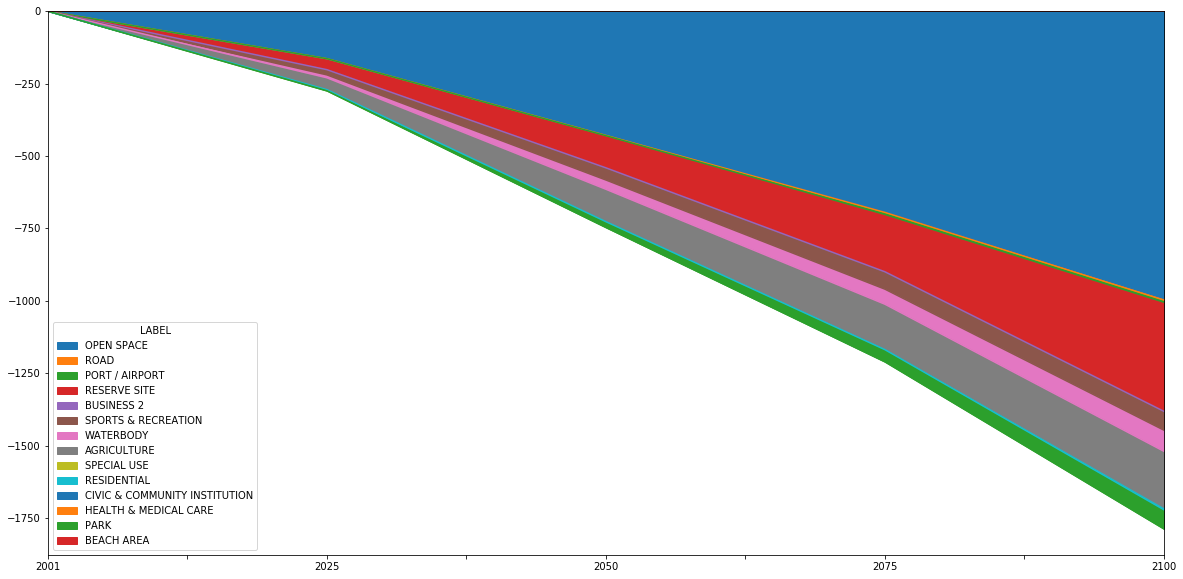

In [4]:
# diff between year and 2011
data_for_2011 = df.iloc[0, :]
(df - data_for_2011).plot.area(figsize=(20,10))

In [5]:
# TODO: repeat for reef and mangrove
# TODO: repeat for ADEM

### other ideas for plots

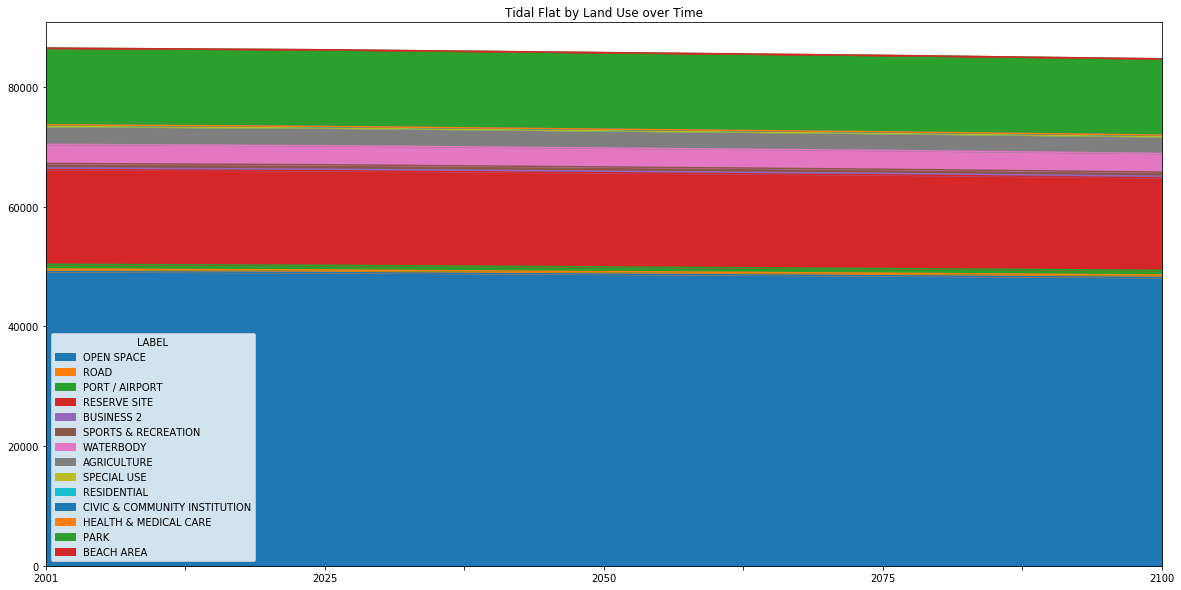

In [6]:
df.plot.area(figsize=(20,10))
plt.title('Tidal Flat by Land Use over Time')
plt.show()


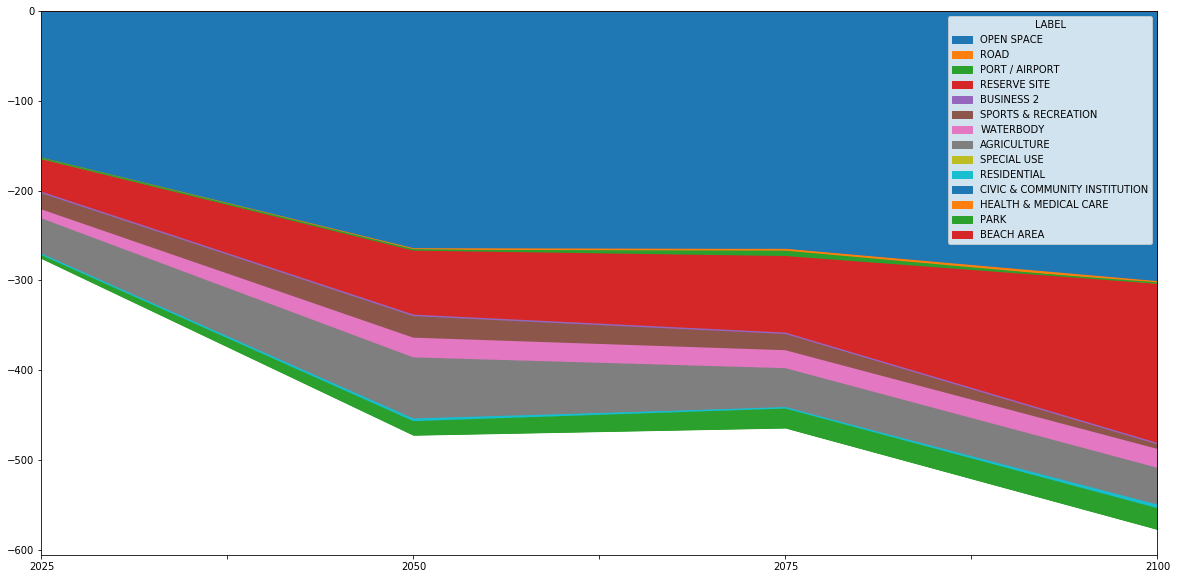

In [7]:
df.diff().iloc[1:].plot.area(figsize=(20,10))

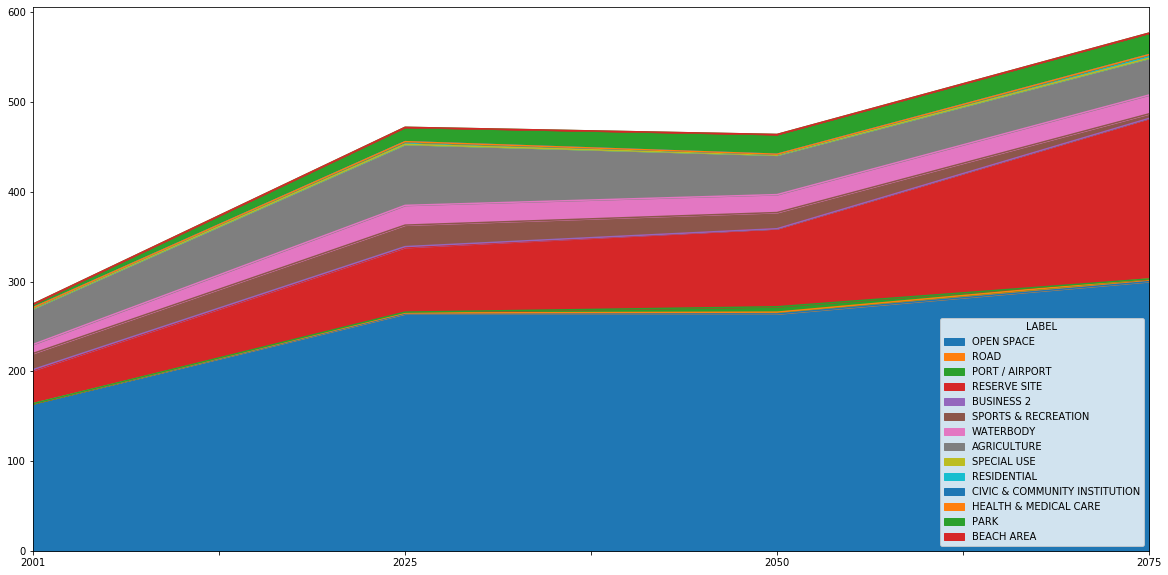

In [8]:
df.diff(periods=-1).iloc[:-1].plot.area(figsize=(20,10))

In [9]:
df

LABEL,OPEN SPACE,ROAD,PORT / AIRPORT,RESERVE SITE,BUSINESS 2,SPORTS & RECREATION,WATERBODY,AGRICULTURE,SPECIAL USE,RESIDENTIAL,CIVIC & COMMUNITY INSTITUTION,HEALTH & MEDICAL CARE,PARK,BEACH AREA
2001,49156,429,790,15840,258,751,3194,2990,16,221,10,23,12806,9
2025,48992,429,790,15803,257,733,3184,2950,16,220,10,23,12802,9
2050,48728,428,789,15731,256,709,3162,2882,16,217,10,23,12786,9
2075,48464,426,783,15644,256,691,3142,2838,16,216,10,23,12764,9
2100,48164,423,783,15465,256,686,3121,2797,16,212,10,23,12740,9
